# Loan Repayment Prediction
- Data: https://www.kaggle.com/datasets/braindeadcoder/lending-club-data
- Mì Ai Blog

Mô tả ngắn về từng tính năng trong tập dữ liệu:

credit_policy: 1 nếu khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của Lending-Club.com, và 0 là ngược lại.

purpose: mục đích của khoản vay như: mở thẻ tín dụng, mua xe hơi, trang thiết bị gia đình…

int_rate: lãi xuất của khoản vay.

installment: số tiền trả góp hàng tháng mà người vay phải trả góp.

log_annual_inc: nhật ký thu nhập hàng năm của người vay

dti: hệ số nợ trên thu nhập (Debt to Income Ratio) là tỉ lệ phần trăm của tổng thu nhập hàng tháng để trả các khoản thanh toán nợ hàng tháng. Công thức: DTI= (Tổng các khoản thanh toán nợ hàng tháng)/(Tổng thu nhập hàng tháng)

fico: điểm FICO là điểm tín dụng của người vay. Các tổ chức Tài Chính, Ngân Hàng dựa vào điểm FICO của người vay để đánh giá rủi ro tín dụng và xác định xem có nên cấp tín dụng hay không.? . 300 – 629: tệ . 630 – 689: khá . 690 – 719: tốt . 720 – 850: xuất sắc

days_with_cr_line: Ngày được cấp hạn mức tín dụng của người vay.

revol_bal: Tín dụng quay vòng là một kiểu hạn mức tín dụng mà khách hàng trả một khoản phí cam kết cho một tổ chức tài chính để vay tiền và sau đó được phép sử dụng tiền khi cần thiết. Ví dụ: phổ biến nhất về tín dụng quay vòng là hạn mức tín dụng cá nhân.

revol_util: Tỉ lệ sử dụng nợ tín dụng là tỉ lệ phần trăm của tổng nợ tín dụng hiện có của người vay đang được sử dụng. Tỉ lệ sử dụng nợ tín dụng là một yếu tố được áp dụng bởi các cơ quan báo cáo tín dụng để tính điểm tín dụng của người vay.

inq_last_6mths: Số lượng các câu hỏi của người vay đối với tổ chức Tài Chính trong 6 tháng qua.

delinq_2yrs: Số lần người vay đã quá 30 ngày đến hạn thanh toán trong 2 năm qua.

pub_rec: Thông tin về lịch sử tín dụng của bên vay (báo cáo tín dụng) mà bên cho vay có thể sử dụng hợp pháp, để bác bỏ yêu cầu vay hoặc đơn xin vay tín dụng. Bao gồm những việc như phá sản, thanh toán trễ hạn và các khoản vay đã xóa bỏ trước đây.

not_fully_paid: thông tin cho biết khoản vay có được hoàn trả hay không(1: hoàn trả đầy đủ; 0: không hoàn trả đầy đủ)

0: Khoản vay chưa thanh toán đầy đủ

1: Khoản vay đã thanh toán đầy đủ

# Load data and check data

In [ ]:
# Mount GDrive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [ ]:
# Install extra lib
!pip install xgboost
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# Read CSV file
df_loan = pd.read_csv('/content/drive/MyDrive/loan_repayment/loan_new_original.csv')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


# EDA dữ liệu

In [ ]:
# Kiểm tra số lượng bản ghi -> 37K bản ghi
df_loan.count()

credit_policy        37066
purpose              37066
int_rate             37066
installment          37066
log_annual_inc       37066
dti                  36966
fico                 37066
days_with_cr_line    37066
revol_bal            37066
revol_util           37054
inq_last_6mths       37066
delinq_2yrs          37032
pub_rec              37066
not_fully_paid       37066
dtype: int64

In [ ]:
# Check for nan record. Only 146 record -> dropna
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


In [ ]:
# Drop all Nan rows
df_loan.dropna(inplace=True)


In [ ]:
# Check for nan record. Only 146 record -> no record
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid


1    26775
0    10145
Name: not_fully_paid, dtype: int64


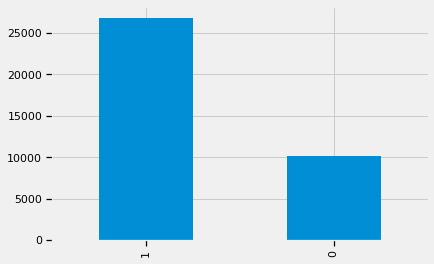

In [ ]:
# Thống kê khoản vay có hoàn trả hay không.
  # 0: khoản vay không được hoàn trả dầy đủ
  # 1: khoản vay được hoàn trả đày đủ

print(df_loan["not_fully_paid"].value_counts())
df_loan["not_fully_paid"].value_counts().plot(kind="bar")

# Dữ liệu imbalance nặng -> cần xử lý -> sẽ xử lý sau

# Pre Processing Data

In [ ]:
# Tìm các field là Object/ String -> chỉ có cột Purpose -> Xử lý cột này bằng OneHot
object_cols = [f for f in df_loan.columns if df_loan[f].dtype =="O"]
print(object_cols)

['purpose']


In [ ]:
# Tìm hiểu qua về cột này
df_loan['purpose'].value_counts()

# Dễ thấy đa số là debt_consolidation -> Có 2 cách
# - Để nguyên và thực hiện onehot
# - Gom lại debt_cosolidation và Others
# -> Mình sẽ thử cách 2

debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: purpose, dtype: int64

In [ ]:
def process_purpose(x):
  if x == "debt_consolidation":
    return 1
  else:
    return 0

df_loan['purpose_int'] = df_loan['purpose'].apply(process_purpose)

In [ ]:
df_loan['purpose_int'].value_counts() # -> chỉ còn 2 giá trị

1    19516
0    17404
Name: purpose_int, dtype: int64

In [ ]:
# Drop purpose và view lại
df_loan.drop(columns=["purpose"], inplace=True)
df_loan

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,1,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,1,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,1,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [ ]:
# Check cột credit_policy -> toàn 1 -> drop
df_loan["credit_policy"].value_counts()

1    36920
Name: credit_policy, dtype: int64

In [ ]:
# Drop credit_policy và view lại
df_loan.drop(columns=["credit_policy"], inplace=True)
df_loan

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [ ]:
# Check Corr để xem có bỏ field nào đi không? -> ko thấy 2 cột input nào quá corr -> giữ lại toàn bộ input.
corr = df_loan.corr()
corr.style.background_gradient(cmap='coolwarm')

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
int_rate,1.000000,0.042739,-0.055919,0.116065,-0.456244,0.086726,0.021824,0.133468,-0.003504,0.172759,0.046075,-0.036599,0.097478
installment,0.042739,1.000000,0.227242,0.084286,0.022387,-0.125390,0.170643,0.028539,0.226005,0.046695,-0.049956,-0.013016,0.140044
log_annual_inc,-0.055919,0.227242,1.000000,-0.121779,0.020853,-0.119594,0.151355,0.044720,0.177392,0.029868,-0.034424,-0.037026,-0.002927
dti,0.116065,0.084286,-0.121779,1.000000,-0.013244,-0.044598,0.077765,0.000342,0.081434,0.032497,-0.010775,-0.031361,0.054696
fico,-0.456244,0.022387,0.020853,-0.013244,1.000000,-0.120728,-0.021722,-0.188516,-0.065700,-0.307689,-0.191167,-0.027124,-0.024893
days_with_cr_line,0.086726,-0.125390,-0.119594,-0.044598,-0.120728,1.000000,-0.066180,-0.068710,-0.187349,-0.052515,-0.006409,-0.038029,-0.006357
revol_bal,0.021824,0.170643,0.151355,0.077765,-0.021722,-0.066180,1.000000,0.128898,-0.203446,-0.146972,-0.067585,-0.356469,0.029699
revol_util,0.133468,0.028539,0.044720,0.000342,-0.188516,-0.068710,0.128898,1.000000,-0.061745,-0.014098,-0.052424,-0.086816,0.004182
inq_last_6mths,-0.003504,0.226005,0.177392,0.081434,-0.065700,-0.187349,-0.203446,-0.061745,1.000000,0.220876,-0.056046,0.219629,-0.007000
delinq_2yrs,0.172759,0.046695,0.029868,0.032497,-0.307689,-0.052515,-0.146972,-0.014098,0.220876,1.000000,-0.030163,0.135084,0.007397


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


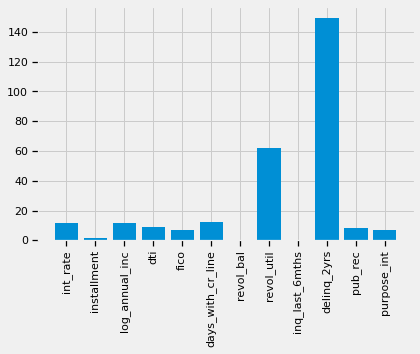

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = df_loan.drop(columns=["not_fully_paid"]).columns.values

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(df_loan[predictors], df_loan["not_fully_paid"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Có quyền chọn K features tốt nhất. Mình bỏ đi installment, revol_bal và inq_last_6MONTHS

In [ ]:
# Scale dữ liệu
X = df_loan[predictors]
y = df_loan["not_fully_paid"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[predictors])
X[predictors] = scaler.transform(X[predictors])

X

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
0,0.352941,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.333333,0.0,0.0
1,0.223529,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.066667,0.0,0.0
2,0.137255,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0,0.0
3,0.458824,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0,0.0
4,0.137255,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.137255,0.464417,0.017957,0.024685,0.161290,0.761488,0.000000,0.000000,0.039809,0.045333,0.0,1.0
37062,0.196078,0.503171,0.013441,0.011742,0.430108,0.447479,0.000000,0.000000,0.002647,0.002200,0.0,1.0
37063,0.498039,0.491626,0.008065,0.009029,0.161290,0.906688,0.000006,0.000000,0.000974,0.002533,0.0,0.0
37064,0.223529,0.260740,0.003449,0.058178,0.618280,0.841511,0.000000,0.000000,0.023003,0.019267,0.0,1.0


In [ ]:
# Split dữ liệu train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Hiển thị thử X_train
X_train.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
24635,0.729412,0.505840,0.013441,0.017107,0.053763,0.697771,0.000000,0.086957,0.018102,0.051333,0.2,1.0
22808,0.266667,0.386884,0.009247,0.003403,0.403226,0.705218,0.000002,0.000000,0.017255,0.043933,0.0,0.0
16378,0.400000,0.236607,0.004839,0.017828,0.080645,0.848958,0.000000,0.000000,0.012404,0.046133,0.0,1.0
25975,0.266667,0.144526,0.005376,0.016697,0.188172,0.832603,0.000006,0.000000,0.014905,0.028933,0.0,0.0
16426,0.086275,0.246575,0.017742,0.004795,0.456989,0.813376,0.000000,0.000000,0.005965,0.011467,0.2,0.0


# Train 01. Upsampling bằng SMOTE, train Logistic Regression

In [ ]:
# Upsampling
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

In [ ]:
# Check xem balance chưa
y_train_resample.value_counts()

1    21484
0    21484
Name: not_fully_paid, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2093
           1       0.87      0.88      0.88      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384



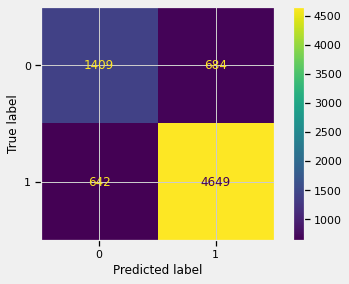

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model_log, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV 

# Grid search tìm tham số
params_grid_logistic={"C":[0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1", "l2"]}# l1 lasso l2 ridge

grid_logistic= GridSearchCV( LogisticRegression(solver='lbfgs', max_iter=1000) ,params_grid_logistic, cv=10)
grid_logistic.fit(X_train_resample, y_train_resample)

print("tuned hpyerparameters :(best parameters) ",grid_logistic.best_params_)
print('\033[1m' + "accuracy :",grid_logistic.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

tuned hpyerparameters :(best parameters)  {'C': 1000, 'penalty': 'l2'}
accuracy : 0.7899836521430871


              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2093
           1       0.87      0.91      0.89      5291

    accuracy                           0.84      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.84      0.83      7384



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


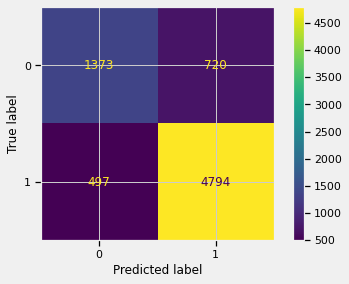

In [ ]:
y_pred = grid_logistic.predict(X_test);
# In ra du lieu
print(classification_report( y_test, y_pred))
plot_confusion_matrix(grid_logistic, X_test, y_test)

# Train 2. Không upsampling. XGBoost

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2093
           1       0.88      0.90      0.89      5291

    accuracy                           0.85      7384
   macro avg       0.81      0.80      0.81      7384
weighted avg       0.84      0.85      0.85      7384



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


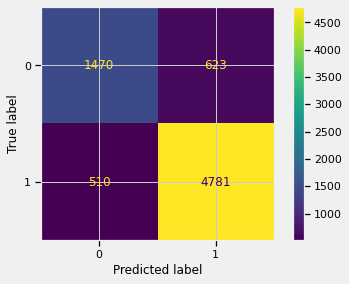

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# In bao cao ket qua
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test)

0.80298


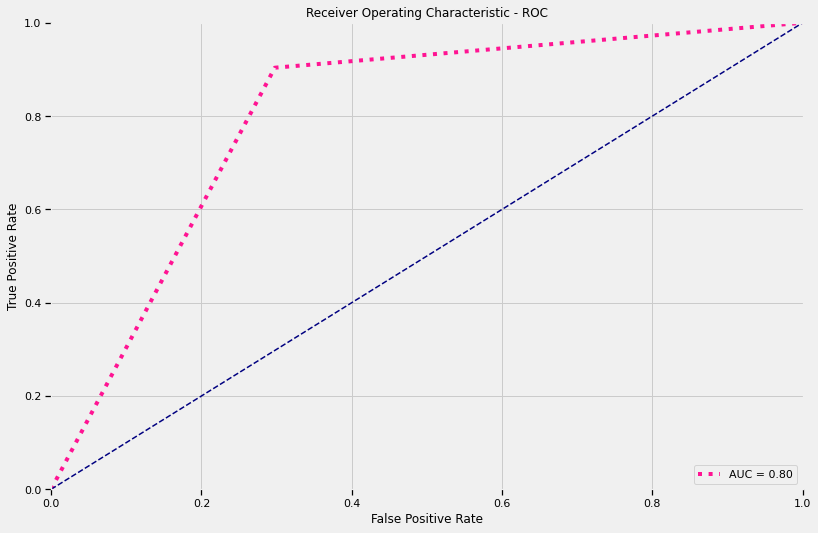

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Grid search XGBoost
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


XGBClassifier(max_depth=4, n_estimators=160, nthread=4, seed=42)